In [1]:
import tensorflow as tf
hello = tf.constant("Hello TensorFlow!")
# not required these things in new tensorflow     sess = tf.Session()
# not required with this method. We can do directly print(sess.run(hello))
print(hello.numpy())




b'Hello TensorFlow!'


**Add**

In [ ]:
import tensorflow as tf
x = 2
y = 3
z = tf.add(x, y, name='Add')
print(z)



**Direct Dependency**

In [ ]:
#direct dependency
a = tf.multiply(8,5)
print(a)
b = tf.multiply(a,1)
print(b)



**Indirect Dependency**

In [ ]:
a = tf.multiply(8,5)
print(a)

b = tf.multiply(4,3)
print(b)






In [ ]:
**Graph**

In [ ]:

graph = tf.Graph()
with graph.as_default():
    z = tf.add(x, y, name='Add')
print(graph.as_graph_def())

**Sessions not needed  in tf2.x**

In [ ]:


a = tf.multiply(3,3)
print(a.numpy())



**Variables**


In [ ]:
#Variables 
x = tf.Variable(13)
W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")
W2 = tf.Variable(W.numpy(), name="weights_2")
print("x:", x.numpy())
print("W shape:", W.shape)
print("W2 shape:", W2.shape)
# tf.global_variables_initializer() not needed in tensorflow 2.0

x = tf.Variable(1212)
print(x.numpy())

#tf.get_variable() and tf.variable_scope() are depretiated in tensorflow 2.0
W3 = tf.Variable(initial_value=tf.random.normal([500, 111]), name='weights')
print("W3 shape:", W3.shape)
print(W3)

x = tf.Variable(initial_value=[0.0, 0.0], name='x')  
a = x  
b = x  
print(a)
print(b)


**Constants**

In [ ]:
#constants

x = tf.constant(13)



# Feed dictionaries are also removed in tensorflow 2.0  along with placeholder

# TensorBoard


In [16]:

import tensorflow as tf

# Define a TensorBoard writer
logdir = './graphs'  # Directory to save the logs
writer = tf.summary.create_file_writer(logdir)

# Create a function that builds the graph

def compute_graph():
    # Define constants
    x = tf.constant(1, name='x')
    y = tf.constant(1, name='y')
    a = tf.constant(3, name='a')
    b = tf.constant(3, name='b')

    # Multiply x and y, a and b
    prod1 = tf.multiply(x, y, name='prod1')
    prod2 = tf.multiply(a, b, name='prod2')

    # Add prod1 and prod2
    return tf.add(prod1, prod2, name='sum')

# Record the graph in TensorBoard
with writer.as_default():
    tf.summary.graph(tf.function(compute_graph).get_concrete_function().graph)

# Run the computation and print the result
result = compute_graph()
print("Sum:", result.numpy())

# To run TensorBoard, use the following command in your terminal:
# tensorboard --logdir=./graphs --port=8000


Sum: 10


# Image

No of images in training set: (60000, 28, 28)
No of labels in training set: (60000,)
No of images in test set: (10000, 28, 28)
No of labels in test set: (10000,)


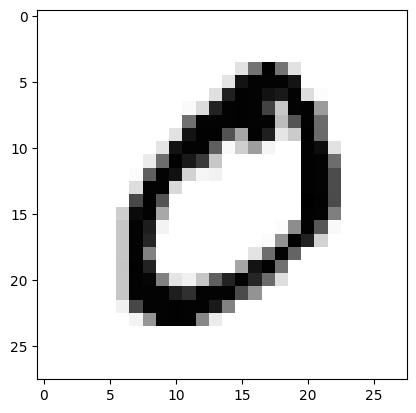

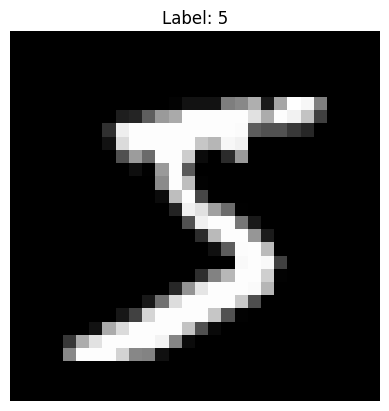

In [8]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt


# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Check the shape of the datasets
print("No of images in training set: {}".format(train_images.shape))
print("No of labels in training set: {}".format(train_labels.shape))
print("No of images in test set: {}".format(test_images.shape))
print("No of labels in test set: {}".format(test_labels.shape))
# Display the first training image

img1 = train_images[1].reshape(28,28)
plt.imshow(img1, cmap='Greys')
plt.show()





# Model Build and Training

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# forward and backward propagation is automatically done in keras tensorflow. So it is not done manually. 
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the number of neurons in each layer
num_input = 784
num_hidden1 = 512
num_hidden2 = 256
num_hidden3 = 128
num_output = 10

# Build the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the input images
model.add(layers.Dense(num_hidden1, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_hidden2, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_hidden3, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_output, activation='sigmoid'))  # Output layer with softmax

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Create a log directory for TensorBoard
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

# Custom callback for logging test metrics
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
        
        # Log the test metrics
        tf.summary.scalar("Test Accuracy", test_accuracy, step=epoch)
        tf.summary.scalar("Test Loss", test_loss, step=epoch)

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_accuracy:.4f}')






c:\Users\L E G I O N\Desktop\7TH Semester\Lab Works\samirenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8136 - loss: 0.7022 - val_accuracy: 0.9482 - val_loss: 0.1707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9548 - loss: 0.1596 - val_accuracy: 0.9641 - val_loss: 0.1175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9696 - loss: 0.1047 - val_accuracy: 0.9703 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0758 - val_accuracy: 0.9720 - val_loss: 0.0895
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9834 - loss: 0.0569 - val_accuracy: 0.9753 - val_loss: 0.0799
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0430 - val_accuracy: 0.9748 - val_loss: 0.0810
Epoch 7/10
1736/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0345

# Here No need to initiate variable to global

# Eager Execution

In [19]:
#Eager Execution is enabled by default.


x = tf.constant(11)
y = tf.constant(11)
z = x*y
print(z)
z.numpy()


tf.Tensor(121, shape=(), dtype=int32)


121

# Math operation in TensorFlow

In [26]:
#Math operation in tensorflow
x = tf.constant([1., 2., 3.])
y = tf.constant([3., 2., 1.])
sum = tf.add(x,y)
print('sum is',sum.numpy())

difference = tf.subtract(x,y)
print('difference is',difference.numpy())

product = tf.multiply(x,y)
print('product is',product.numpy())

division = tf.divide(x,y)
print('division is',division.numpy())

dot_product = tf.reduce_sum(tf.multiply(x, y))
print('dot product is',dot_product.numpy())

x = tf.constant([10, 0, 13, 9])
print('min value index is',tf.argmin(x).numpy()) #minimum value index
print('max value index is',tf.argmax(x).numpy()) #maximum value index



#squared difference between x and y
x = tf.Variable([1,3,5,7,11])
y = tf.Variable([1])
tf.math.squared_difference(x,y).numpy()


#typecasting

print(x.dtype)
x = tf.cast(x, dtype=tf.float32)
print (x.dtype)


sum is [4. 4. 4.]
difference is [-2.  0.  2.]
product is [3. 4. 3.]
division is [0.33333334 1.         3.        ]
dot product is 10.0
min value index is 1
max value index is 2
<dtype: 'int32'>
<dtype: 'float32'>


In [27]:
#concantenate 2 matrices rowwise
x = [[3,6,9], [7,7,7]]
y = [[4,5,6], [5,5,5]]
tf.concat([x, y], 0).numpy()

array([[3, 6, 9],
       [7, 7, 7],
       [4, 5, 6],
       [5, 5, 5]])

In [28]:
tf.concat([x, y], 1).numpy()
#column wise concatenate

array([[3, 6, 9, 4, 5, 6],
       [7, 7, 7, 5, 5, 5]])

In [29]:
#stack the 
tf.stack(x, axis=1).numpy()


array([[3, 7],
       [6, 7],
       [9, 7]])

In [30]:
x = tf.Variable([[1.0, 5.0], [2.0, 3.0]])
x.numpy()
tf.reduce_mean(input_tensor=x).numpy()

#reduced mean



2.75

In [31]:
#mean across column
tf.reduce_mean(input_tensor=x, axis=1, keepdims=True).numpy()


array([[3. ],
       [2.5]], dtype=float32)

In [32]:
#Draw random values from the probability distributions:

tf.random.normal(shape=(3,2), mean=10.0, stddev=2.0).numpy()
tf.random.uniform(shape = (3,2), minval=0, maxval=None, dtype=tf.float32,).numpy()

array([[0.617892  , 0.72745967],
       [0.94492507, 0.5514846 ],
       [0.728614  , 0.6576817 ]], dtype=float32)

In [33]:
#Softmax Probability
x = tf.constant([7., 2., 5.])
tf.nn.softmax(x).numpy()

array([0.8756006 , 0.00589975, 0.11849965], dtype=float32)

In [36]:
#Defining Square Function
def square(x):
    return tf.multiply(x, x)

with tf.GradientTape(persistent=True) as tape:
    print (square(6.).numpy())




36.0
